In [1]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import math
from pandas_datareader import data
import scipy.optimize
from scipy import stats
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import griddata

In [2]:
#import warnings
#warnings.filterwarnings("ignore")
import time



In [3]:
#read list if tickers from a csv file and print them out
tickers_file = '/Users/austin/OneDrive/Documents/Math for algo trading/Hwk2/TechTickers.csv'
tickers = [];
f = open(tickers_file,"r",encoding='utf-8-sig')
for line in csv.reader(f):
    tickers.append(str(line[0]))
f.close

<function TextIOWrapper.close()>

In [4]:
d = len(tickers)
print(d)

64


In [5]:
#downoad the prices and volumes for the previously read list of tickers for the first month
#of the earliest year in the proposed time period
start_date = '2009-01-01'
end_date = '2019-12-31'
stock_data = data.get_data_yahoo(tickers, start_date, end_date)

/Users/austin/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:230: SymbolWarning: Failed to read symbol: 'SNE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [6]:
stock_data.head()

Attributes      High                                                         \
Symbols         AAPL        ACN       ADBE        ADI       ADSK       AKAM   
Date                                                                          
2009-01-02  3.251429  33.799999  23.100000  19.780001  20.760000  15.890000   
2009-01-05  3.435000  34.169998  23.309999  19.969999  20.920000  16.290001   
2009-01-06  3.470357  33.950001  24.450001  20.600000  21.709999  16.750000   
2009-01-07  3.303571  34.049999  24.809999  20.020000  20.580000  16.360001   
2009-01-08  3.326786  33.650002  24.379999  19.830000  19.610001  15.510000   

Attributes                                  ...  Adj Close            \
Symbols      AMAT   AMD       ANSS     APH  ...        TEL       TER   
Date                                        ...                        
2009-01-02  10.72  2.43  28.809999  6.3925  ...  13.154851  4.383240   
2009-01-05  10.80  2.68  28.990000  6.4175  ...  12.948709  4.852538   
2009-01-06  11.71  2.85  29.690001  6.7875  ...  13.399170  5.040256   
2009-01-07  11.31  2.72  28.610001  6.7225  ...  13.360993  4.918238   
2009-01-08  10.76  2.74  27.020000  6.6675  ...  13.017428  5.115344   

Attributes                                                               \
Symbols          TSM        TXN    TYL        VMW       VRSN        WDC   
Date                                                                      
2009-01-02  5.295133  11.830398  11.99  19.721378  17.509497   9.680981   
2009-01-05  5.192065  11.697635  11.62  19.721378  17.441565   9.437585   
2009-01-06  5.411086  12.132795  11.68  20.419186  17.501005  11.243444   
2009-01-07  4.966604  11.491118  11.51  20.626867  16.278227  10.615318   
2009-01-08  4.857094  11.269854  11.57  21.872952  16.711294  10.709541   

Attributes                        
Symbols          XLNX       ZBRA  
Date                              
2009-01-02  13.925655  21.030001  
2009-01-05  13.834635  20.740000  
2009-01-06  14.115276  21.260000  
2009-01-07  13.569165  21.280001  
2009-01-08  12.894120  20.629999  

[5 rows x 384 columns]

# Preparation

In [20]:
price = stock_data['Adj Close'].values
vol = stock_data['Volume'].values
#days = price.shape[0] 
ret = (price[1:]-price[:-1])/price[0:-1]
#mu = np.mean(rate,axis=0) * 250
#Sigma = np.cov(rate.T) *250

ult = lambda x : x**gamma/gamma

R = 0.01
R_daily = R/250

N = 250
T = 100
gamma = -5

# 1

[[0.         0.        ]
 [0.         0.00044401]]
[[0.         0.        ]
 [0.         0.00030734]]
[[0.         0.        ]
 [0.         0.00032567]]
[[0.         0.        ]
 [0.         0.00025294]]
[[0.         0.        ]
 [0.         0.00018104]]
[[0.         0.        ]
 [0.         0.00027364]]
[[0.         0.        ]
 [0.         0.00034582]]
[[0.         0.        ]
 [0.         0.00028822]]
[[0.         0.        ]
 [0.         0.00042636]]
[[0.         0.        ]
 [0.         0.00037794]]
[[0.         0.        ]
 [0.         0.00032642]]
[[0.         0.        ]
 [0.         0.00022794]]
[[0.         0.        ]
 [0.         0.00017809]]
[[0.         0.        ]
 [0.         0.00019333]]
[[0.         0.        ]
 [0.         0.00019876]]
[[0.         0.        ]
 [0.         0.00028207]]
[[0.         0.        ]
 [0.         0.00030795]]
[[0.         0.        ]
 [0.         0.00025456]]
[[0.         0.        ]
 [0.         0.00016283]]
[[0.         0.        ]
 [0.  

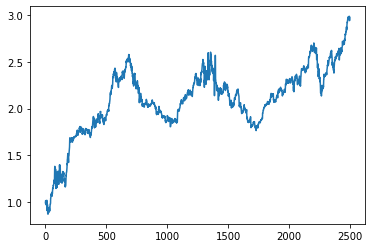

In [21]:
n_win = 25
asset = 0

# compute alpha star
alpha_star = []
bt_date0 = N
for k in range(n_win):
    #data = ret[bt_date0-N:bt_date0+T,asset]
    data_cali = ret[(bt_date0-N):bt_date0,asset]

    Mu = np.array([R_daily,np.mean(data_cali)]) 
    Sig = np.diag([0,np.var(data_cali)]) 
    print(Sig)

    obj = lambda alpha : -(alpha@Mu - 0.5*(1-gamma)*alpha@Sig@alpha)
    alpha0 = np.array([.5,.5])
    constr = {'type': 'eq', 'fun': lambda alpha:  np.sum(alpha) - 1}
    opt = scipy.optimize.minimize(obj, alpha0, constraints=constr,  options={'maxiter':1e6})
    alpha_star.append(opt.x)
    '''Update the back-test date'''
    bt_date0 = bt_date0+T
    #print(opt.x)

# back testing
PnL = []
cum_ret = 1
bt_date0 = N
for k in range(n_win):    
    a = alpha_star[k]
    for r in ret[bt_date0:(bt_date0+T),asset]:
        cum_ret = cum_ret*(1+a@np.array([R_daily,r]))
        PnL.append(cum_ret)
    bt_date0 = bt_date0 + T

#print(PnL)    
plt.plot(PnL)


# 2

Dynamics:

\begin{align*}
\overline{R}^t(\alpha) = \overline{R}^{t-1} \left(1 + (1-\alpha)R + \alpha(a+cF^{t-1}+\epsilon^t)\right)
\end{align*}

\begin{align*}
F^t = e^{-\rho}F^{t-1} + (a+cF^{t-1} + \epsilon^t)\eta^t
\end{align*}

DPP:
\begin{align*}
\begin{cases}
V(t,r,f) = \max_{\alpha\in\mathbf{R}}\mathbf{E}\left[V\left(t+1,\overline{R}^{t+1},F^{t+1}\right)\big|\,\overline{R}^{t}=r,F^{t}=f\right] \\
V(T,r,f) = \frac{r^\gamma}{\gamma}
\end{cases}
\end{align*}

Ansatz: 
\begin{align*}
V(t,r,f) = r^\gamma v(t,f).
\end{align*}
It follows that
\begin{align*}
\begin{cases}
v(t,f) = max_{\alpha\in\mathbf{R}}\mathbf{E}\left[\left(1 + (1-\alpha)R + \alpha(a+cf+\epsilon^t)\right)^\gamma v(t+1,e^{-\rho}f+(a+cf + \epsilon^t)\eta^t)\right] \\
v(t,f) = \frac{1}{\gamma}
\end{cases}
\end{align*}

## set inputs and compute factors

In [35]:
rho = 1
gamma = 0.5
n_win = 20 # number of back testing windowns
asset = 6

factor = [[np.nan]*d] 
temp = 0
for i in range(ret.shape[0]-1):
    temp = temp*np.exp(-rho) + ret[i]*vol[i]
    factor.append(temp)
factor = np.array(factor)    

print(factor)

[[            nan             nan             nan ...             nan
              nan             nan]
 [ 7.87124187e+06  4.68081809e+05 -1.92450340e+05 ... -1.62260041e+04
  -4.38461250e+03  1.54448374e+04]
 [-1.97668349e+06  8.91198542e+05  4.98882339e+05 ... -1.43916290e+03
   6.64059303e+03  9.83768016e+03]
 ...
 [ 3.99835745e+05  8.94012551e+04  1.42780864e+04 ...  1.09370469e+03
  -2.47190584e+02 -8.93555852e+02]
 [ 1.38255561e+05  5.94285399e+04  1.42308414e+04 ...  2.34018465e+02
   4.84318197e+02  1.44857471e+03]
 [ 2.67890107e+05 -1.36828986e+05 -2.44801229e+04 ... -1.31647253e+03
  -2.05860775e+03 -1.06781314e+03]]


## prepare parameters

In [58]:
c, a, sig, mu_hat, sig_hat, mu_tilda, sig_tilda = [], [], [], [], [], [], []
for k in range(n_win):
    bt_start = N + k*T
    cali_start, cali_end = np.max([1,bt_start-N]), bt_start
    x, y = factor[cali_start:cali_end,asset], ret[cali_start:cali_end,asset]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    c.append(slope), a.append(intercept), sig.append(np.std(y-slope*x))
    mu_hat.append(np.mean(vol[cali_start:cali_end,asset]))
    sig_hat.append(np.std(vol[cali_start:cali_end,asset]))
    mu_tilda.append(np.mean(x)), sig_tilda.append(np.std(x))
    


## Dynamic Programming

In [55]:
grid_sz = 100

def expn(alpha,f,v_furt,a_k,c_k,sig_k,mu_hat_k,sig_hat_k): 
    y = 0
    for r_furt in [a_k+c_k*f-sig_k,a_k+c_k*f+sig_k]:
        for f_furt in [np.exp(-rho)*f+r_furt*(mu_hat_k-sig_hat_k), np.exp(-rho)*f+r_furt*(mu_hat_k+sig_hat_k)]:
            y = y + (1+(1-alpha)*R_daily+alpha*r_furt)**gamma * v_furt(f_furt)
    return y/4



start = time.time()


alpha_star_bt = []
f_bt = []
for k in range(n_win): 
    lb, ub = mu_tilda[k]-3*sig_tilda[k], mu_tilda[k]+3*sig_tilda[k]
    f_grid = np.linspace(lb,ub,grid_sz)
    v_vec, alpha_star_vec = [], []
    v_furt = lambda f : -1 # terminal condition
    for t in range(T-1,0,-1):
        print(k,t)
        alpha_star, v = [], []
        x0 = [0]
        for f in f_grid:          
            a_k,c_k,sig_k,mu_hat_k,sig_hat_k = a[k],c[k],sig[k],mu_hat[k],sig_hat[k]            
            obj = lambda alpha: expn(alpha,f,v_furt,a_k,c_k,sig_k,mu_hat_k,sig_hat_k) 
            opt = scipy.optimize.minimize(obj,[0],bounds=((-1,1),)) # the 'correct' solution should not include the bounds
            alpha_star.append(opt.x[0]), v.append(opt.fun)
            #print(opt)
        v_vec.append(v), alpha_star_vec.append(alpha_star)    
        v_furt = InterpolatedUnivariateSpline(f_grid, v, k=1)         
                
    f_bt.append(f_grid), alpha_star_bt.append(alpha_star_vec[::-1])
        


end = time.time()
print('It takes', end - start, 'seconds to run', n_win, 'windows.')

0 99
0 98
0 97
0 96
0 95
0 94
0 93
0 92
0 91
0 90
0 89
0 88
0 87
0 86
0 85
0 84
0 83
0 82
0 81
0 80
0 79
0 78
0 77
0 76
0 75
0 74
0 73
0 72
0 71
0 70
0 69
0 68
0 67
0 66
0 65
0 64
0 63
0 62
0 61
0 60
0 59
0 58
0 57
0 56
0 55
0 54
0 53
0 52
0 51
0 50
0 49
0 48
0 47
0 46
0 45
0 44
0 43
0 42
0 41
0 40
0 39
0 38
0 37
0 36
0 35
0 34
0 33
0 32
0 31
0 30
0 29
0 28
0 27
0 26
0 25
0 24
0 23
0 22
0 21
0 20
0 19
0 18
0 17
0 16
0 15
0 14
0 13
0 12
0 11
0 10
0 9
0 8
0 7
0 6
0 5
0 4
0 3
0 2
0 1
1 99
1 98
1 97
1 96
1 95
1 94
1 93
1 92
1 91
1 90
1 89
1 88
1 87
1 86
1 85
1 84
1 83
1 82
1 81
1 80
1 79
1 78
1 77
1 76
1 75
1 74
1 73
1 72
1 71
1 70
1 69
1 68
1 67
1 66
1 65
1 64
1 63
1 62
1 61
1 60
1 59
1 58
1 57
1 56
1 55
1 54
1 53
1 52
1 51
1 50
1 49
1 48
1 47
1 46
1 45
1 44
1 43
1 42
1 41
1 40
1 39
1 38
1 37
1 36
1 35
1 34
1 33
1 32
1 31
1 30
1 29
1 28
1 27
1 26
1 25
1 24
1 23
1 22
1 21
1 20
1 19
1 18
1 17
1 16
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
2 99
2 98
2 97
2 96
2 95
2 9

15 28
15 27
15 26
15 25
15 24
15 23
15 22
15 21
15 20
15 19
15 18
15 17
15 16
15 15
15 14
15 13
15 12
15 11
15 10
15 9
15 8
15 7
15 6
15 5
15 4
15 3
15 2
15 1
16 99
16 98
16 97
16 96
16 95
16 94
16 93
16 92
16 91
16 90
16 89
16 88
16 87
16 86
16 85
16 84
16 83
16 82
16 81
16 80
16 79
16 78
16 77
16 76
16 75
16 74
16 73
16 72
16 71
16 70
16 69
16 68
16 67
16 66
16 65
16 64
16 63
16 62
16 61
16 60
16 59
16 58
16 57
16 56
16 55
16 54
16 53
16 52
16 51
16 50
16 49
16 48
16 47
16 46
16 45
16 44
16 43
16 42
16 41
16 40
16 39
16 38
16 37
16 36
16 35
16 34
16 33
16 32
16 31
16 30
16 29
16 28
16 27
16 26
16 25
16 24
16 23
16 22
16 21
16 20
16 19
16 18
16 17
16 16
16 15
16 14
16 13
16 12
16 11
16 10
16 9
16 8
16 7
16 6
16 5
16 4
16 3
16 2
16 1
17 99
17 98
17 97
17 96
17 95
17 94
17 93
17 92
17 91
17 90
17 89
17 88
17 87
17 86
17 85
17 84
17 83
17 82
17 81
17 80
17 79
17 78
17 77
17 76
17 75
17 74
17 73
17 72
17 71
17 70
17 69
17 68
17 67
17 66
17 65
17 64
17 63
17 62
17 61
17 60
17 59
17 58
17 5

In [49]:
#print(alpha_star_bt)

## back testing

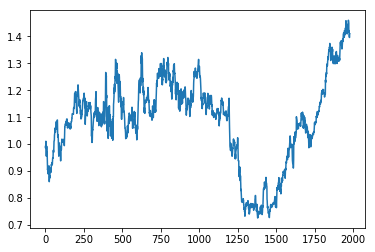

In [57]:
PnL2 = []
daily_ret2 = []
cum_ret = 1
for k in range(n_win):
    bt_start = N + k*T
    for i in range(T-1):
        x, y = f_bt[k], alpha_star_bt[k][i]
        alpha_bt_func =  InterpolatedUnivariateSpline(x,y,k=1)
        alpha_bt = alpha_bt_func(factor[bt_start+i,asset])
        cum_ret = cum_ret * (1 + (1-alpha_bt)*R_daily + alpha_bt*ret[bt_start+i,asset] )
        PnL2.append(cum_ret), daily_ret2.append((1-alpha_bt)*R_daily + alpha_bt*ret[bt_start+i,asset])
    
plt.plot(PnL2)
plt.show()


# 3

Dynamics:

\begin{align*}
\overline{R}^t(\alpha) = \overline{R}^{t-1} \left(1 + (1-\alpha)R_0 + \alpha(\mu + \epsilon^t) - \lambda|\alpha-A^{t-1}|\right)
\end{align*}


DPP:
\begin{align*}
\begin{cases}
V(t,r,a) = \max_{\alpha\in\mathbf{R}}\mathbf{E}\left[V\left(t+1,\overline{R}^{t+1},A^{t+1}\right)\big|\,\overline{R}^{t}=r,A^{t}=a\right] \\
V(T,r,a) = \frac{r^\gamma}{\gamma}
\end{cases}
\end{align*}

Ansatz: 
\begin{align*}
V(t,r,a) = r^\gamma v(t,a).
\end{align*}
It follows that
\begin{align*}
\begin{cases}
v(t,a) = max_{\alpha\in\mathbf{R}}\mathbf{E}\left[\left(1 + (1-\alpha)R + \alpha(\mu+\epsilon^{t+1})-\lambda|\alpha-a|\right)^\gamma v(t+1,\frac{\alpha(1+\mu+\epsilon^{t+1})}{1+(1-\alpha)R + \alpha(\mu+\epsilon^{t+1})})\right] \\
v(t,f) = \frac{1}{\gamma}
\end{cases}
\end{align*}

## set inputs and compute factors

In [105]:
lam = 0.01
gamma = 0.5
n_win = 3
asset = 1

mu, sig = [], []
for k in range(n_win):
    bt_start = N + k*T
    temp = ret[(bt_start-N):bt_start,asset]
    mu.append(np.mean(temp)), sig.append(np.std(temp))
#print(np.array(mu)+np.array(sig))
#print(np.array(mu)-np.array(sig))

## Dynamic Programming


In [106]:
grid_sz = 100

def expn(alpha,a,v_furt,mu_k,sig_k): 
    y = 0
    for r_furt in [mu_k-sig_k,mu_k+sig_k]: 
        y = y + (1+(1-alpha)*R_daily+alpha*r_furt-lam*np.abs(alpha-a))**gamma * v_furt(
            alpha*(1+r_furt)/(1+(1-alpha)*R_daily+alpha*r_furt))        
    return y/2



start = time.time()


alpha_star_bt = []
a_grid = np.linspace(-2,2,grid_sz)
for k in range(n_win):            
    print(k,t)
    alpha_star_mat = [] # v_mat=[]
    # DPP
    v_furt = lambda a : -1 # terminal condition
    for t in range(T-1,0,-1):
        alpha_star, v = [], []
        for a in a_grid:          
            mu_k, sig_k = mu[k], sig[k]            
            obj = lambda alpha: expn(alpha,a,v_furt,mu_k,sig_k)
            opt = scipy.optimize.minimize(obj,[0],bound=((-2,2),)) # the 'correct' solution may not include the bounds
            alpha_star.append(opt.x), v.append(opt.fun)
            #print(opt)
            alpha_star_mat.append(alpha_star)    # _mat.append(v),
        v_furt = InterpolatedUnivariateSpline(a_grid, v, k=1)  
    alpha_star_bt.append(alpha_star_mat[::-1])
        


end = time.time()
print('It takes', end - start, 'seconds to run', n_win, 'windows.')

0 99
0 98
0 97
0 96
0 95
0 94
0 93
0 92
0 91
0 90
0 89
0 88
0 87
0 86
0 85
0 84
0 83
0 82
0 81
0 80
0 79
0 78
0 77
0 76
0 75
0 74
0 73
0 72
0 71
0 70
0 69
0 68
0 67
0 66
0 65
0 64
0 63
0 62
0 61
0 60
0 59
0 58
0 57
0 56
0 55
0 54
0 53
0 52
0 51
0 50
0 49
0 48
0 47
0 46
0 45
0 44
0 43
0 42
0 41
0 40
0 39
0 38
0 37
0 36
0 35
0 34
0 33
0 32
0 31
0 30
0 29
0 28
0 27
0 26
0 25
0 24
0 23
0 22
0 21
0 20
0 19
0 18
0 17
0 16
0 15
0 14
0 13
0 12
0 11
0 10
0 9
0 8
0 7
0 6
0 5
0 4
0 3
0 2
0 1
1 99
1 98
1 97
1 96
1 95
1 94
1 93
1 92
1 91
1 90
1 89
1 88
1 87
1 86
1 85
1 84
1 83
1 82
1 81
1 80
1 79
1 78
1 77
1 76
1 75
1 74
1 73
1 72
1 71
1 70
1 69
1 68
1 67
1 66
1 65
1 64
1 63
1 62
1 61
1 60
1 59
1 58
1 57
1 56
1 55
1 54
1 53
1 52
1 51
1 50
1 49
1 48
1 47
1 46
1 45
1 44
1 43
1 42
1 41
1 40
1 39
1 38
1 37
1 36
1 35
1 34
1 33
1 32
1 31
1 30
1 29
1 28
1 27
1 26
1 25
1 24
1 23
1 22
1 21
1 20
1 19
1 18
1 17
1 16
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
2 99
2 98
2 97
2 96
2 95
2 9

In [108]:
print(alpha_star_bt[0][0])

[array([5.35621999]), array([5.36704357]), array([5.37803868]), array([5.3905332]), array([5.4014025]), array([5.41593841]), array([5.42347525]), array([5.43782854]), array([5.44878699]), array([5.45823643]), array([5.47125286]), array([5.48216371]), array([5.49317922]), array([5.50564432]), array([5.51973088]), array([5.52769786]), array([5.5385171]), array([5.55472012]), array([5.56279749]), array([5.57540647]), array([5.58505178]), array([5.59593601]), array([5.60684164]), array([5.619876]), array([5.62598307]), array([5.6403706]), array([5.65302506]), array([5.66576121]), array([5.67711206]), array([5.68803588]), array([5.6958112]), array([5.71527956]), array([5.72313264]), array([5.73902028]), array([5.74865334]), array([5.75814072]), array([5.77094446]), array([5.78362505]), array([5.79641155]), array([5.80281856]), array([5.81889803]), array([5.82711995]), array([5.84309505]), array([5.84903127]), array([5.87209151]), array([5.87464861]), array([5.88798027]), array([5.90090016])

# Backtesting

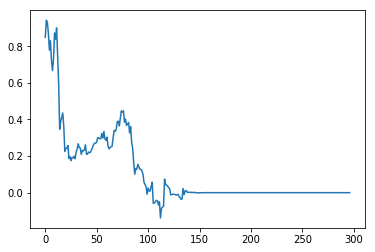

In [107]:
PnL3 = []
cum_ret = 1
A = 0
for k in range(n_win):
    bt_date0 = N + k*T
    for i in range(T-1):
        x, y = a_grid, alpha_star_bt[k][i]
        alpha_bt_func =  InterpolatedUnivariateSpline(x,y,k=1)
        alpha_bt = alpha_bt_func(A)
        cum_ret = cum_ret * (1 + (1-alpha_bt)*R_daily + alpha_bt*ret[bt_date0+i,asset] - lam*np.abs(A-alpha_bt))
        #print( (1 + (1-alpha_bt)*R_daily + alpha_bt*ret[bt_date0+i,asset] - np.abs(A-alpha_bt)) )
        PnL3.append(cum_ret)
        A = alpha_bt*(1+ret[bt_date0+i,asset]) / (1 + (1-alpha_bt)*R_daily + alpha_bt*ret[bt_date0+i,asset])
    
plt.plot(PnL3)
plt.show()